**`Load Package`**

In [1]:
import os
import logging
import subprocess
import psutil
import resource
# memory_limit = 20 * 1024 * 1024 * 1024
# resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

In [16]:
process = psutil.Process()
memory_in_bytes = process.memory_info().rss
memory_in_gb = memory_in_bytes / (1024 * 1024 * 1024)
print("当前内存使用情况（GB）：", memory_in_gb)


当前内存使用情况（GB）： 3.6452255249023438


**`Load h5ad Data in scanpy`**

In [1]:
import os
import logging
import subprocess

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

In [2]:
input_file = '../Data/raw_h5ad/Immune_ALL_hum_mou.h5ad'
adata = sc.read_h5ad(input_file)
adata
print()
print(adata.X.shape)
print()
print(adata.obs.head())
print()
print(adata.var.head())

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)



(97861, 8135)

                                batch chemistry data_type  dpt_pseudotime  \
index                                                                       
AAACCTGCAGCGAACA-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGCATGTCCTC-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGGTCGACTGC-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGGTCGCTTCT-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGTCCCGACTT-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   

                            final_annotation   mt_frac  n_counts  n_genes  \
index                                                                       
AAACCTGCAGCGAACA-1-Oetjen_A        Monocytes  0.047970    6379.0   1862.0   
AAACCTGCATGTCCTC-1-Oetjen_A     CD4+ T cells  0.024928    4172.0   1082.0   
AAACCTGGTCGACTGC-1-Oetjen_A        Monocytes  0.051907    6608.0   1618.0   
AAACCTGGTCGCTTCT-1-Oetjen_A        Monocytes  0.041716    5

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/obs/__categories/batch' was written without encoding metadata.
  return func(*args, **kwargs)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/obs/batch' was written without encoding metadata.
  return func(*args, **kwargs)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/obs/__categories/chemistry' was written without encoding metadata.
  return func(*args, **kwargs)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/obs/chemistry' was written without encoding metadata.
  return func(*args, **kwargs)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/ob

In [12]:
print("Keys in adata.obs:")
print(adata.obs_keys())
print()

print("Unique values in 'species' column:")
print(adata.obs['species'].unique().tolist())
print()

print("Unique values in 'study' column:")
print(adata.obs['study'].unique().tolist())
print()

print("Unique values in 'batch' column:")
print(adata.obs['batch'].unique().tolist())
print()

Keys in adata.obs:
['batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue']

Unique values in 'species' column:
['Human', 'Mouse']

Unique values in 'study' column:
['Oetjen', 'Freytag', '10X', 'Sun', 'Villani', 'Dahlin_BM', 'MCA_PB', 'MCA_BM']

Unique values in 'batch' column:
['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani', 'Dahlin_1', 'Dahlin_4', 'Dahlin_3', 'Dahlin_2', 'MCA_PB_6', 'MCA_PB_3', 'MCA_PB_5', 'MCA_PB_2', 'MCA_PB_4', 'MCA_PB_1', 'MCA_BM_1', 'MCA_BM_3', 'MCA_BM_2']



In [22]:
study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
    'study': x['study'].unique().tolist(),
    'species': x['species'].unique().tolist()
}))
print(study_species_batch)

print()

study_species = adata.obs.groupby('study')['species'].unique().apply(lambda x: list(x))
print(study_species)

human_data = adata[adata.obs['species'] == 'Human']
mouse_data = adata[adata.obs['species'] == 'Mouse']
human_data.write('../Data/Immune_human_mouse/human_alldata.h5ad')
mouse_data.write('../Data/Immune_human_mouse/mouse_alldata.h5ad')
print("Data saved successfully!")

/tmp/ipykernel_3675904/2111604329.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({


                      study  species
batch                               
10X                   [10X]  [Human]
Dahlin_1        [Dahlin_BM]  [Mouse]
Dahlin_2        [Dahlin_BM]  [Mouse]
Dahlin_3        [Dahlin_BM]  [Mouse]
Dahlin_4        [Dahlin_BM]  [Mouse]
Freytag           [Freytag]  [Human]
MCA_BM_1           [MCA_BM]  [Mouse]
MCA_BM_2           [MCA_BM]  [Mouse]
MCA_BM_3           [MCA_BM]  [Mouse]
MCA_PB_1           [MCA_PB]  [Mouse]
MCA_PB_2           [MCA_PB]  [Mouse]
MCA_PB_3           [MCA_PB]  [Mouse]
MCA_PB_4           [MCA_PB]  [Mouse]
MCA_PB_5           [MCA_PB]  [Mouse]
MCA_PB_6           [MCA_PB]  [Mouse]
Oetjen_A           [Oetjen]  [Human]
Oetjen_P           [Oetjen]  [Human]
Oetjen_U           [Oetjen]  [Human]
Sun_sample1_CS        [Sun]  [Human]
Sun_sample2_KC        [Sun]  [Human]
Sun_sample3_TB        [Sun]  [Human]
Sun_sample4_TC        [Sun]  [Human]
Villani           [Villani]  [Human]

study
10X          [Human]
Dahlin_BM    [Mouse]
Freytag      [Human]
MCA_B

**`Load human all immune Data in scanpy`**

In [13]:
# input_file = '../Data/Immune_human_mouse/human_alldata.h5ad'
# adata = sc.read_h5ad(input_file)
# human_data = adata[adata.obs['tissue'] == 'PBMCs']
# human_data.write('../Data/Immune_human_mouse/human_pbmcs.h5ad')
# print("Human PBMCs data saved successfully!")

In [14]:
input_file = '../Data/Immune_human_mouse/human_alldata.h5ad'
adata = sc.read_h5ad(input_file)
print(adata)
# adata=sc.concat([adata1,adata2,adata3],merge='same')
print(adata.obs['batch'].unique().tolist())

AnnData object with n_obs × n_vars = 33506 × 8135
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'
['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']


In [19]:
study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
    'study': x['study'].unique().tolist(),
    'species': x['species'].unique().tolist(),
    'chemistry': x['chemistry'].unique().tolist(),
    'tissue': x['tissue'].unique().tolist()
}))
print(study_species_batch)
print('')
print(adata.obs['study'].value_counts())
print('')
print(adata.obs['batch'].value_counts())
print('')
print(adata.obs['tissue'].value_counts())
print('')
print(adata.obs['chemistry'].value_counts())

                    study  species     chemistry         tissue
batch                                                          
10X                 [10X]  [Human]      [v3_10X]        [PBMCs]
Freytag         [Freytag]  [Human]      [v2_10X]        [PBMCs]
Oetjen_A         [Oetjen]  [Human]      [v2_10X]  [Bone_Marrow]
Oetjen_P         [Oetjen]  [Human]      [v2_10X]  [Bone_Marrow]
Oetjen_U         [Oetjen]  [Human]      [v2_10X]  [Bone_Marrow]
Sun_sample1_CS      [Sun]  [Human]         [10X]        [PBMCs]
Sun_sample2_KC      [Sun]  [Human]         [10X]        [PBMCs]
Sun_sample3_TB      [Sun]  [Human]         [10X]        [PBMCs]
Sun_sample4_TC      [Sun]  [Human]         [10X]        [PBMCs]
Villani         [Villani]  [Human]  [smart-seq2]        [PBMCs]

study
10X        10727
Oetjen      9581
Sun         8829
Freytag     3347
Villani     1022
Name: count, dtype: int64

batch
10X               10727
Oetjen_U           3730
Freytag            3347
Oetjen_P           3265
Oetjen_A   

/tmp/ipykernel_1504680/1347045980.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
/tmp/ipykernel_1504680/1347045980.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({


We have 9581, 10727, 3347, 8829, and 1022 cells from the Oetjen (3 human donors), 10X (1 human donors), Freytag(1 human donors), Sun (4 human donors) and Villani (1 human donors) respectively.

The immune cell atlas contains immune cells from 5 datasets comprising human cells from bone marrow and peripheral blood.

Bone marrow datasets were retrieved from Oetjen et al.[1] 

For peripheral blood data, human samples were obtained from 10X Genomics[2], Freytag et al.[3], Sun et al. [4] and Villani et al.[5].

1. Oetjen, K. A. et al. Human bone marrow assessment by single-cell RNA sequencing, mass cytometry, and flow cytometry. JCI Insight 3, (2018).
2. Datasets -Single Cell Gene Expression -Official 10x Genomics Support. https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.0.0/pbmc_10k_v3.
3. Freytag, S., Tian, L., Lönnstedt, I., Ng, M. & Bahlo, M. Comparison of clustering tools in R for medium-sized 10x Genomics single-cell RNA-sequencing data. F1000Res. 7, 1297 (2018).
4. Sun, Z. et al. A Bayesian mixture model for clustering droplet-based single-cell transcriptomic data from population studies. Nat. Commun. 10, 1649 (2019).
5. Villani, A.-C. et al. Single-cell RNA-seq reveals new types of human blood dendritic cells, monocytes, and progenitors. Science 356, (2017).

In [20]:
# Checking the total size of the data set
adata.shape

(33506, 8135)

We have 33506 cells and 8135 genes in the dataset.

## `1. Pre-processing and visualization`

**`1.1 Quality control`**

In [28]:
%%time
adata = ov.pp.qc(
    adata, 
    mode='seurat',
    min_cells=20, 
    min_genes=800,
    tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
    batch_key=None
)

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 33506
!!!It should be noted that the `scrublet` detection is too old and             may not work properly.!!!
!!!if you want to use novel doublet detection,             please set `doublets_method=sccomposite`!!!
Begin of post doublets removal and QC plot using`scrublet`
Cells retained after scrublet: 33252, 254 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_qc.py:315: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['passing_mt'] = adata.obs['mito_perc'] < tresh['mito_perc']


Lower treshold, nUMIs: 500; filtered-out-cells:         11
Lower treshold, n genes: 250; filtered-out-cells:         0
Lower treshold, mito %: 0.2; filtered-out-cells:         0
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 11
Cells retained after scrublet and seurat filtering: 33241, 265 removed.


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


CPU times: user 12min 17s, sys: 38.3 s, total: 12min 55s
Wall time: 12min 12s


低质量细胞: 死细胞, 碎片化细胞, 污染细胞,细胞质量不良(偏差较大的基因表达数据), 双细胞

指标: 线粒体基因比例, 基因数目, UMI数目, 细胞周期评分

线粒体指标设置为5% 20% 视具体的细胞类型而确定

使用 scrublet 去双细胞

自动过滤模式: 5倍的绝对中位差（MAD）作为过滤标准, 去除那些明显偏离正常基因表达模式的细胞。通常，MAD是用来识别异常值的统计量，因为它能够有效反映数据的分布。

In [29]:
adata.write('../Data/Immune_human_mouse/human_alldata_qc.h5ad')

In [32]:
print(adata)

study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
    'study': x['study'].unique().tolist(),
    'species': x['species'].unique().tolist(),
    'chemistry': x['chemistry'].unique().tolist(),
    'tissue': x['tissue'].unique().tolist()
}))
print(study_species_batch)
print('')
print(adata.obs['study'].value_counts())
print('')
print(adata.obs['batch'].value_counts())
print('')
print(adata.obs['tissue'].value_counts())
print('')
print(adata.obs['chemistry'].value_counts())

AnnData object with n_obs × n_vars = 25507 × 8128
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells'
    uns: 'scrublet'
    layers: 'counts'
                    study  species     chemistry         tissue
batch                                                          
10X                 [10X]  [Human]      [v3_10X]        [PBMCs]
Freytag         [Freytag]  [Human]      [v2_10X]        [PBMCs]
Oetjen_A         [Oetjen]  [Human]      [v2_10X]  [Bone_Marrow]
Oetjen_P         [Oetjen]  [Human]      [v2_10X]  [Bone_Marrow]
Oetjen_U         [Oetjen]  [Human]      [v2_10X]  [Bone_Marrow]
Sun_sample1_CS      [Sun]  [Human]         [10X]        [PBMCs]
Sun_sample2_KC      [Sun]  [Human]         [10X]        [PBMCs]
S

/tmp/ipykernel_1504680/1082737052.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
/tmp/ipykernel_1504680/1082737052.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({


**`1.2 Normalization`**

In [39]:
adata_bk = adata.copy()

adata.layers["counts"] = adata.X.copy()

adata = ov.pp.preprocess(
    adata, 
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()

Begin robust gene identification
After filtration, 8128/8128 genes are kept.     Among 8128 genes, 8128 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


Time to analyze data in cpu: 12.415595531463623 seconds.
End of size normalization: shiftlog and HVGs selection pearson


*****
mode='shiftlog|pearson': 数据归一化后的总和目标值使用Seurat中的默认值 10,000 ,即log10k进行移位对数转换

mode='pearson|pearson': 皮尔森残差的计算方法基于“标准化的差异”——即实际观测到的基因表达和根据模型预期的基因表达之间的差异，经过标准化后用于去除基因表达中的噪音和技术偏差。

移位对数适用于大多数任务, 寻找稀有细胞的时候，可以考虑采用皮尔森残差法来进行归一化。

In [40]:
adata = adata[:, adata.var['highly_variable']]
print(adata.shape)
ov.pp.scale(adata,max_value=10)
print(adata)

(25507, 2000)


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts', 'scaled'


In [41]:
adata.write('../Data/Immune_human_mouse/human_alldata_preprocess.h5ad')

**`1.3 Reduction`**

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_umap1', ylabel='X_umap2'>]

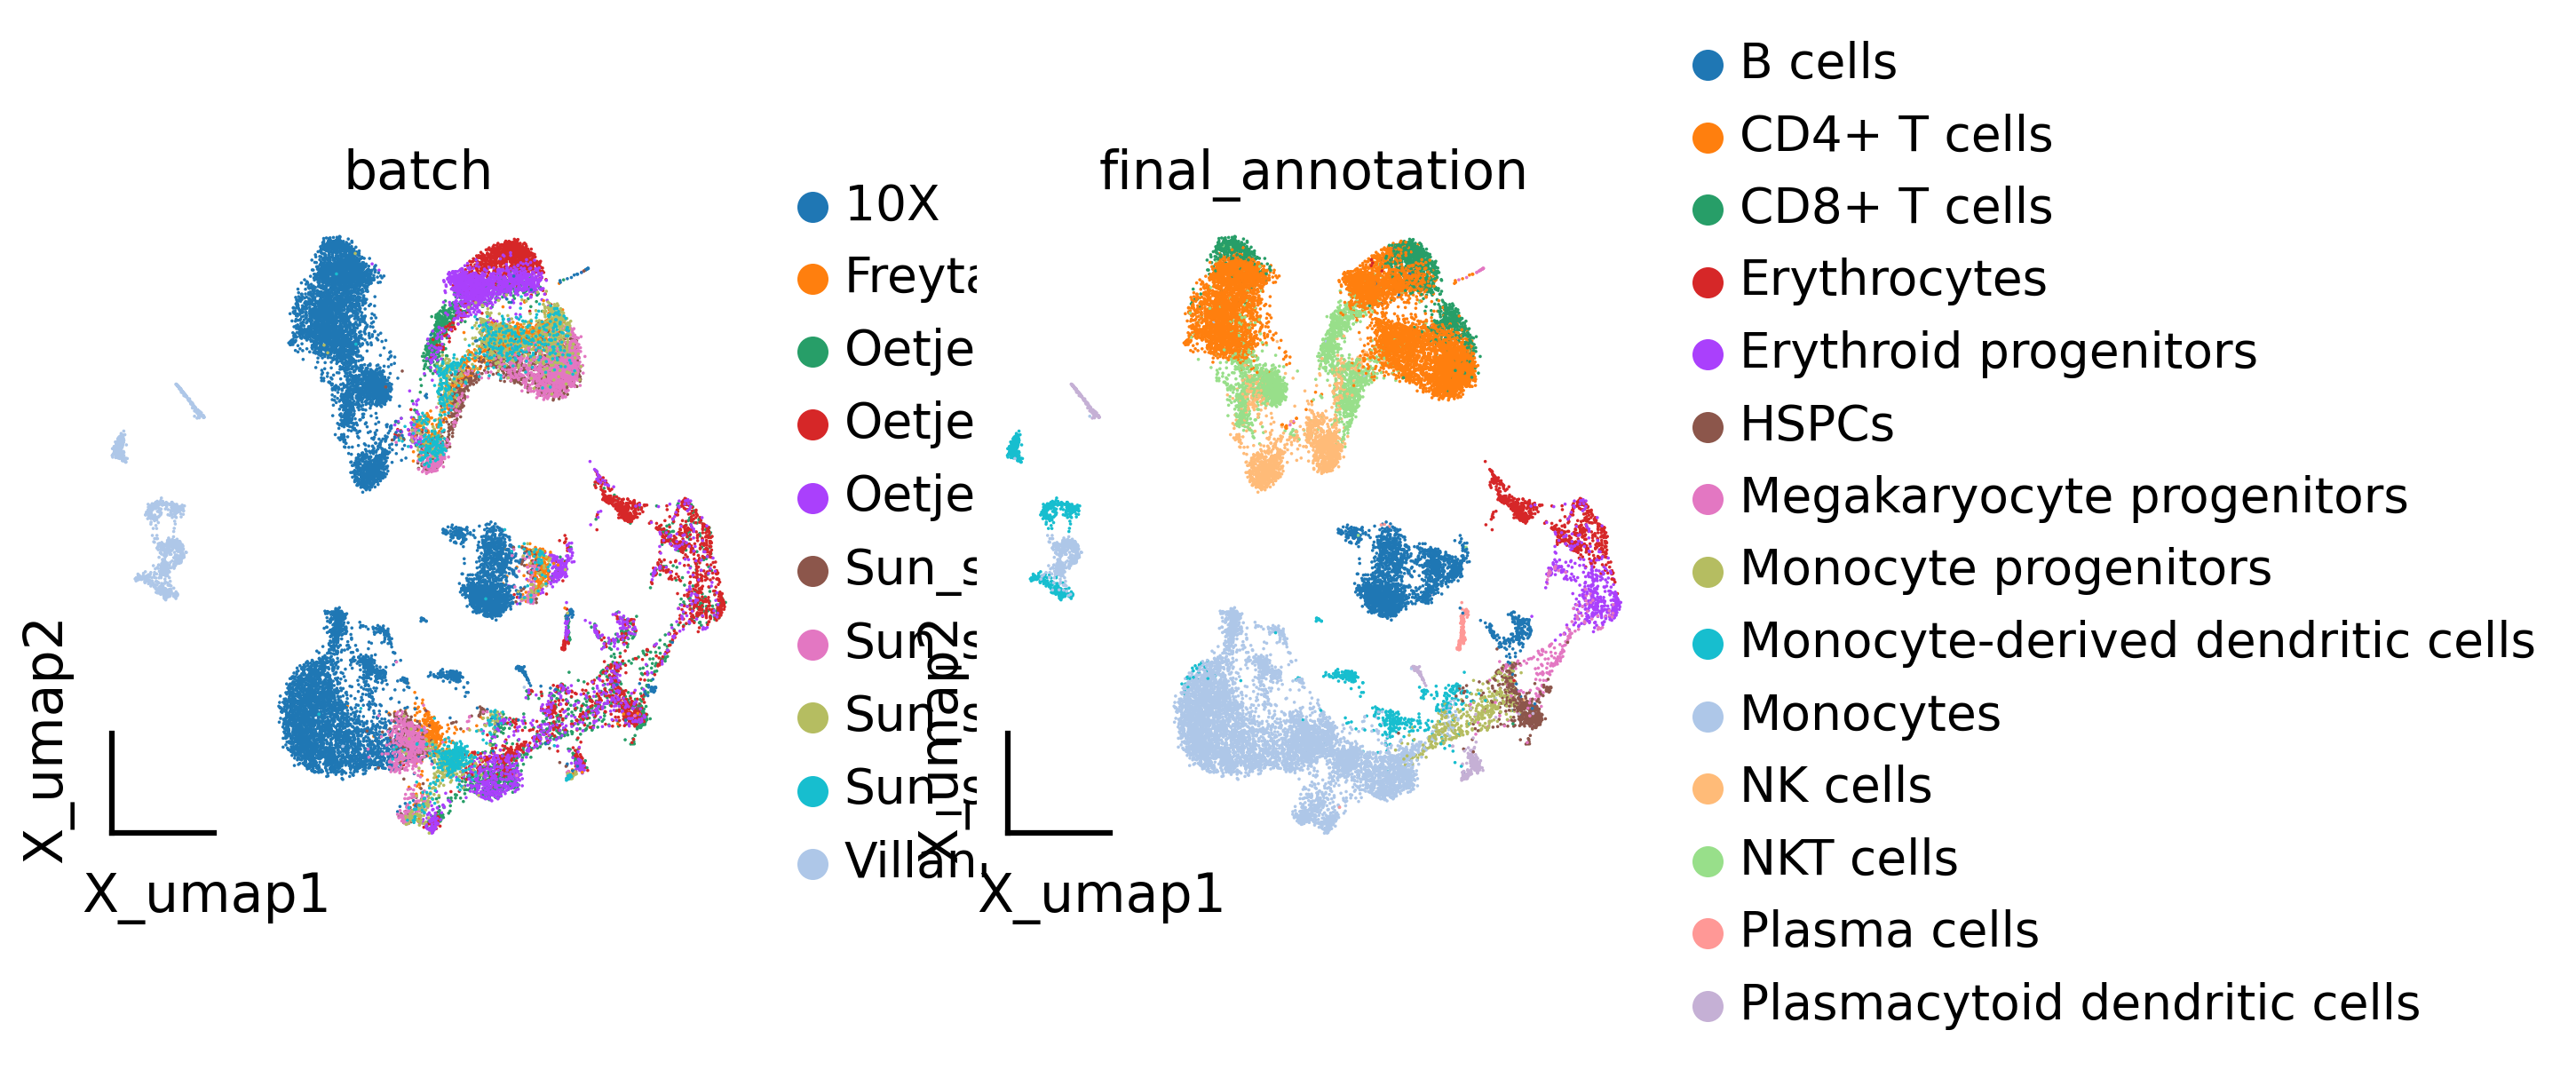

In [43]:
ov.pp.pca(adata,layer='scaled',n_pcs=50)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')
sc.tl.umap(adata)

ov.utils.embedding(
    adata, 
    basis='X_umap',
    frameon='small',
    color=['batch', 'final_annotation'],
    show=False
)

In [52]:
ov.utils.embedding(
    adata, 
    basis='X_umap',
    frameon='small',
    color='batch',
    size=10,
    show=False
)

plt.gcf().set_size_inches(7, 5)
plt.savefig("../Analysis/Human_immune_preprocessed_umap_batch.pdf", format='pdf', bbox_inches='tight')
plt.close() 

ov.utils.embedding(
    adata, 
    basis='X_umap',
    frameon='small',
    color='final_annotation',
    size=10,
    show=False
)

plt.gcf().set_size_inches(7, 5)
plt.savefig("../Analysis/Human_immune_preprocessed_umap_cellannotation.pdf", format='pdf', bbox_inches='tight')
plt.close() 

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/

In [51]:
adata.write('../Data/Immune_human_mouse/human_alldata_reduction.h5ad')

## `2. Benchmark of integration tools`

In [56]:
import omicverse as ov
print(f"omiverse version: {ov.__version__}")
import scanpy as sc
print(f"scanpy version: {sc.__version__}")
import scvi
print(f"scvi version: {scvi.__version__}")
import scib
print(f"scib version: {scib.__version__}")
# ov.ov_plot_set()

omiverse version: 1.6.10
scanpy version: 1.10.4
scvi version: 1.3.0
scib version: 1.1.7


In [57]:
adata_bk = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_qc.h5ad')
adata_bk.obs['batch'].unique()

['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']
Categories (10, object): ['10X', 'Freytag', 'Oetjen_A', 'Oetjen_P', ..., 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']

In [69]:
adata = adata_bk.copy()
adata.layers["counts"] = adata.X.copy()
adata = ov.pp.preprocess(
    adata,
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.raw = adata
adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()
adata = adata[:, adata.var.highly_variable_features]

ov.pp.scale(adata,max_value=10)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

sc.pp.neighbors(
    adata,
    use_rep='X_pca',
    key_added='pca_neighbours'
)

sc.tl.umap(
    adata,
    neighbors_key='pca_neighbours'
)

key_added = 'X_pca'
adata.obsm[f'{key_added}_umap'] = adata.obsm['X_umap'].copy()

Begin robust gene identification
After filtration, 8128/8128 genes are kept.     Among 8128 genes, 8128 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 8.081101894378662 seconds.
End of size normalization: shiftlog and HVGs selection pearson
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    wit

In [70]:
adata

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_pca_umap1', ylabel='X_pca_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_pca_umap1', ylabel='X_pca_umap2'>]

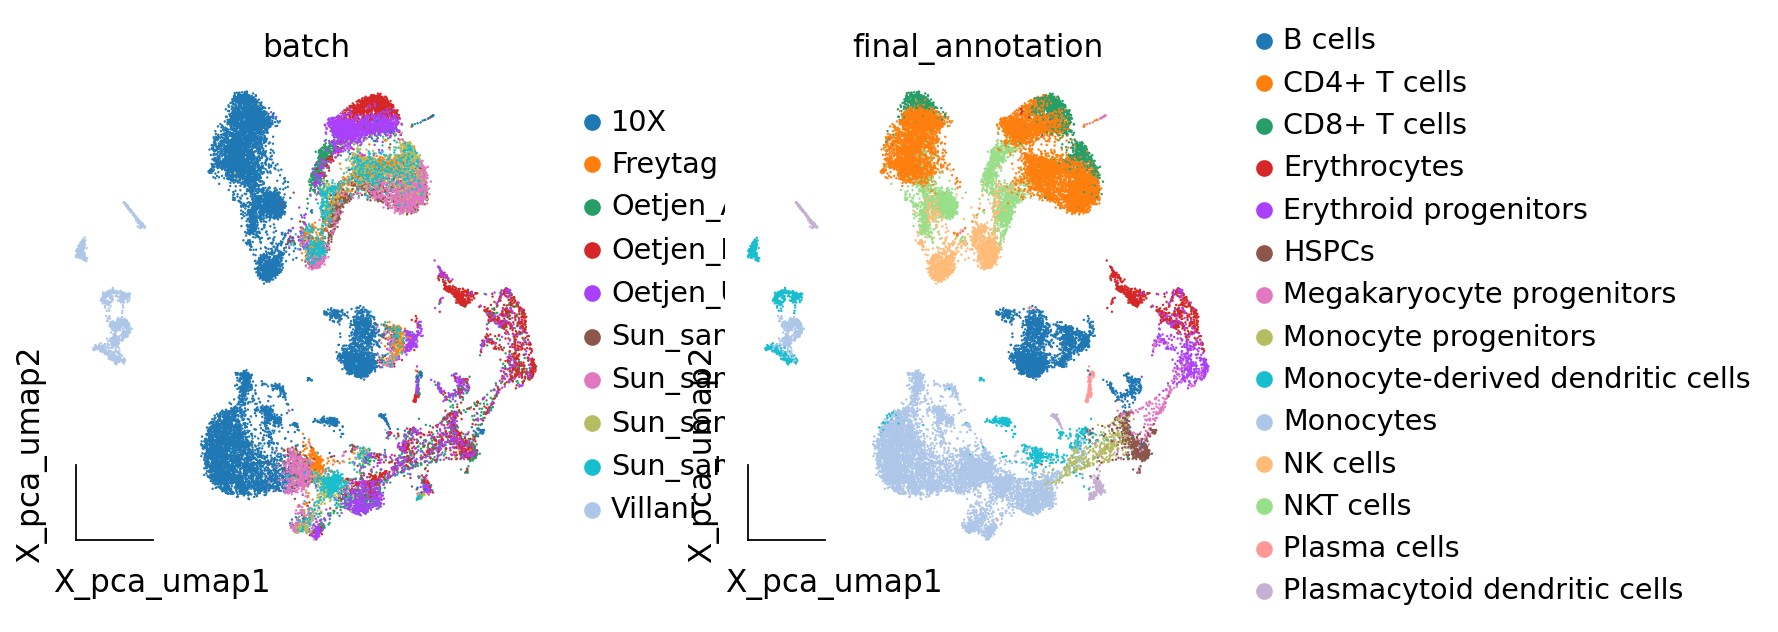

In [71]:
ov.utils.embedding(adata,
                basis='X_pca_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

**`2.1 Harmony`**

In [72]:
adata_harmony=adata.copy()
ov.single.batch_correction(adata_harmony,batch_key='batch',
                                        methods='harmony',n_pcs=50)

2025-04-27 13:11:51,979 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


...Begin using harmony to correct batch effect


2025-04-27 13:11:56,014 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-04-27 13:11:56,293 - harmonypy - INFO - Iteration 1 of 10
2025-04-27 13:12:06,970 - harmonypy - INFO - Iteration 2 of 10
2025-04-27 13:12:15,768 - harmonypy - INFO - Iteration 3 of 10
2025-04-27 13:12:23,397 - harmonypy - INFO - Iteration 4 of 10
2025-04-27 13:12:30,702 - harmonypy - INFO - Iteration 5 of 10
2025-04-27 13:12:37,694 - harmonypy - INFO - Converged after 5 iterations


In [74]:
sc.pp.neighbors(
    adata_harmony,
    use_rep='X_harmony',
    key_added='harmony_neighbours'
)

sc.tl.umap(
    adata_harmony,
    neighbors_key='harmony_neighbours'
)

key_added = 'X_harmoney'
adata_harmony.obsm[f'{key_added}_umap'] = adata_harmony.obsm['X_umap'].copy()
print(adata_harmony)

computing neighbors
    finished: added to `.uns['harmony_neighbours']`
    `.obsp['harmony_neighbours_distances']`, distances for each pair of neighbors
    `.obsp['harmony_neighbours_connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:15)
AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'sc

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_harmoney_umap1', ylabel='X_harmoney_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_harmoney_umap1', ylabel='X_harmoney_umap2'>]

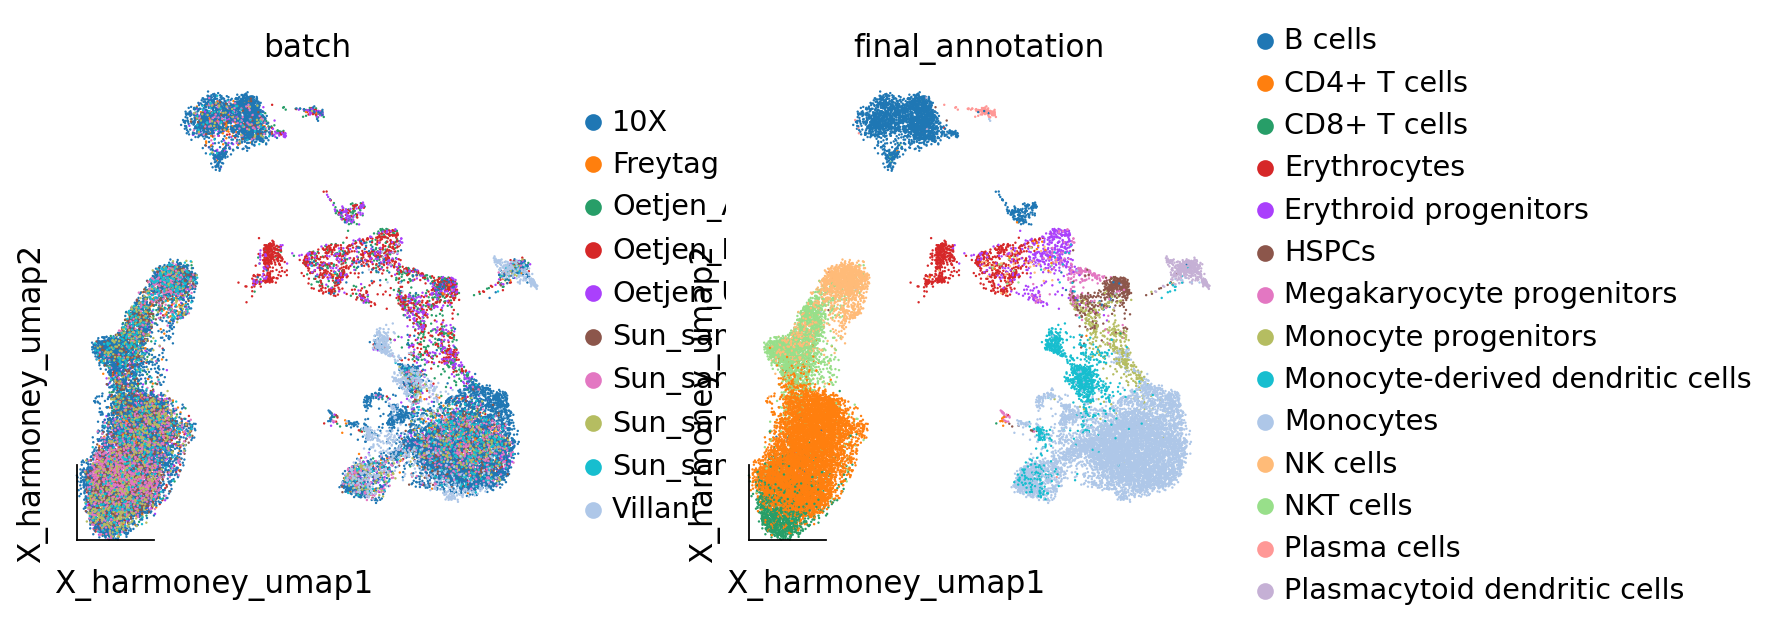

In [75]:
ov.utils.embedding(adata_harmony,
                basis='X_harmoney_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [76]:
adata.obsm['X_harmony'] = adata_harmony.obsm['X_harmony'].copy()
adata.obsm['X_harmoney_umap'] = adata_harmony.obsm['X_harmoney_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours

**`2.2 Scanorama`**

In [77]:
adata_scanorama=adata.copy()
ov.single.batch_correction(adata_scanorama,batch_key='batch',
                                        methods='scanorama',n_pcs=50)

...Begin using scanorama to correct batch effect
10X
Freytag
Oetjen_A
Oetjen_P
Oetjen_U
Sun_sample1_CS
Sun_sample2_KC
Sun_sample3_TB
Sun_sample4_TC
Villani
Found 2000 genes among all datasets
[[0.         0.57206068 0.21880998 0.03133568 0.07418273 0.3683858
  0.22654462 0.14795918 0.15555556 0.19863014]
 [0.         0.         0.03729456 0.05436157 0.08280657 0.70730074
  0.35271808 0.44387755 0.38777778 0.        ]
 [0.         0.         0.         0.72984645 0.88339731 0.00803751
  0.00629291 0.12755102 0.09777778 0.        ]
 [0.         0.         0.         0.         0.75984912 0.01942398
  0.01315789 0.09438776 0.03       0.        ]
 [0.         0.         0.         0.         0.         0.03415941
  0.02517162 0.38435374 0.19444444 0.00489237]
 [0.         0.         0.         0.         0.         0.
  0.92677346 0.4005102  0.40444444 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.68478261 0.59666667 0.00097847]
 [0.         0.     

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 

In [79]:
sc.pp.neighbors(
    adata_scanorama,
    use_rep='X_scanorama',
    key_added='scanorama_neighbours'
)

sc.tl.umap(
    adata_scanorama,
    neighbors_key='scanorama_neighbours'
)

key_added = 'X_scanorama'
adata_scanorama.obsm[f'{key_added}_umap'] = adata_scanorama.obsm['X_umap'].copy()
print(adata_scanorama)

computing neighbors
    finished: added to `.uns['scanorama_neighbours']`
    `.obsp['scanorama_neighbours_distances']`, distances for each pair of neighbors
    `.obsp['scanorama_neighbours_connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:18)
AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>]

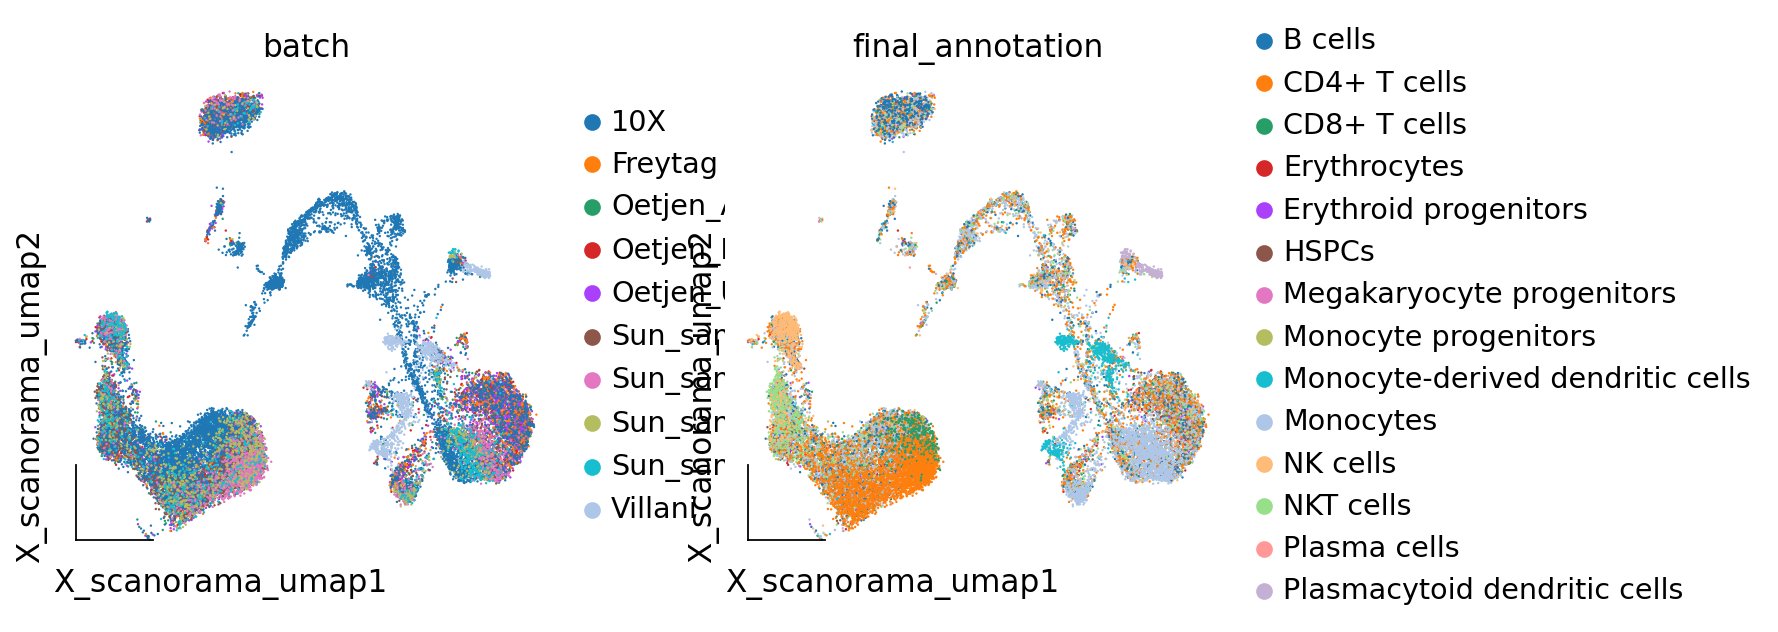

In [80]:
ov.utils.embedding(adata_scanorama,
                basis='X_scanorama_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [82]:
adata.obsm['X_scanorama'] = adata_scanorama.obsm['X_scanorama'].copy()
adata.obsm['X_scanorama_umap'] = adata_scanorama.obsm['X_scanorama_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_nei

**`2.3 scVI`**

In [86]:
adata_scVI=adata.copy()
scvi.model.SCVI.setup_anndata(adata_scVI, layer="counts", batch_key="batch")
vae = scvi.model.SCVI(adata_scVI, n_layers=2, n_latent=30, gene_likelihood="nb")
vae

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [87]:
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/314 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=314` reached.


In [90]:
print(vae)
print()
adata_scVI.obsm["X_scVI"] = vae.get_latent_representation()
print(adata_scVI)

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False



AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI'
    varm: 'PCs', '

In [91]:
sc.pp.neighbors(
    adata_scVI,
    use_rep='X_scVI',
    key_added='scVI_neighbours'
)

sc.tl.umap(
    adata_scVI,
    neighbors_key='scVI_neighbours'
)

key_added = 'X_scVI'
adata_scVI.obsm[f'{key_added}_umap'] = adata_scVI.obsm['X_umap'].copy()
print(adata_scVI)

computing neighbors
    finished: added to `.uns['scVI_neighbours']`
    `.obsp['scVI_neighbours_distances']`, distances for each pair of neighbors
    `.obsp['scVI_neighbours_connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:14)
AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scVI_umap1', ylabel='X_scVI_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scVI_umap1', ylabel='X_scVI_umap2'>]

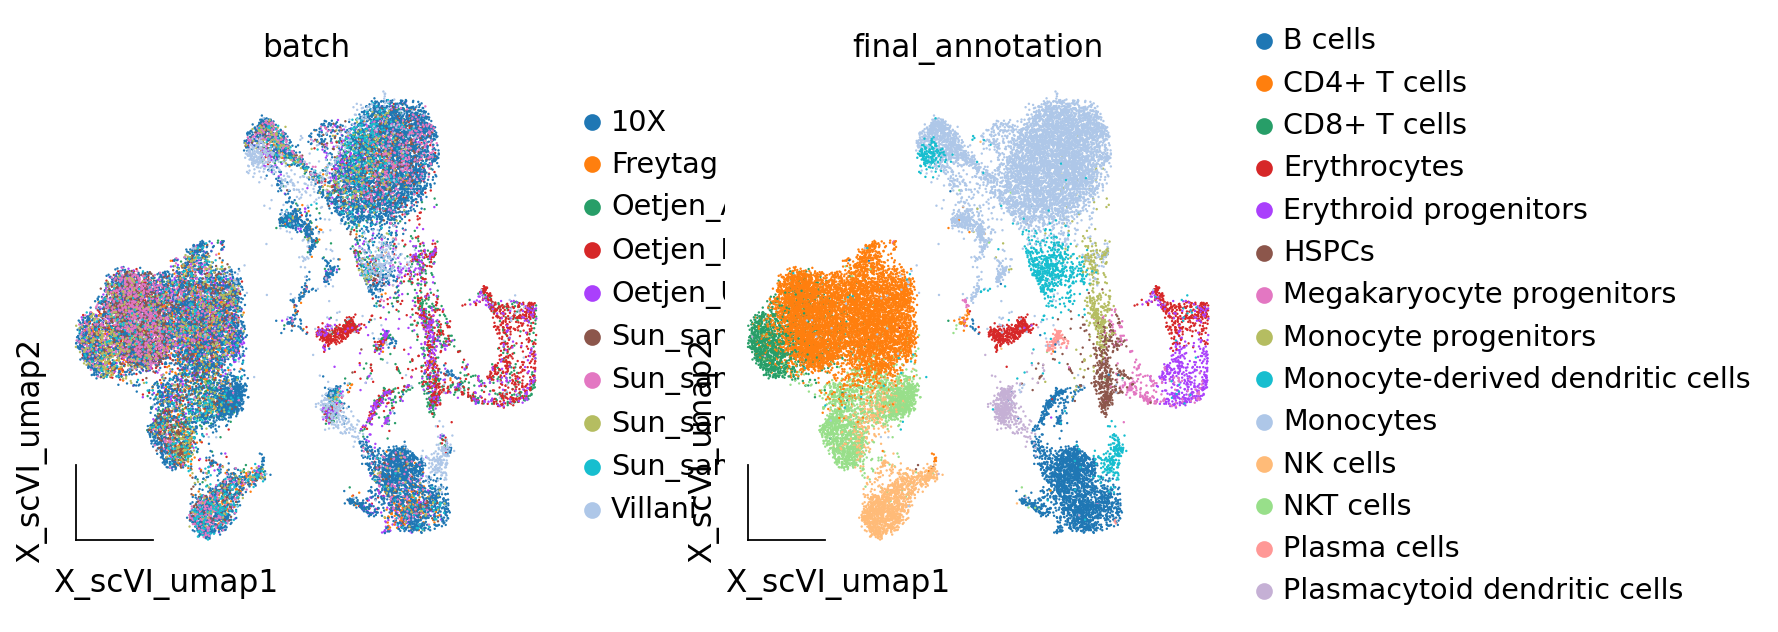

In [92]:
ov.utils.embedding(adata_scVI,
                basis='X_scVI_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [94]:
adata.obsm['X_scVI'] = adata_scVI.obsm['X_scVI'].copy()
adata.obsm['X_scVI_umap'] = adata_scVI.obsm['X_scVI_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI', 'X_scVI_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 's

In [95]:
adata.write('../Data/Immune_human_mouse/human_alldata_reduction.h5ad')